##### Step 1. Import the necessary libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


##### Step 2. Import the dataset *chipotle.tsv*

In [24]:
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep="\t")

##### Step 3. Assign it to a variable called chipo.

In [25]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [26]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


##### Step 4. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [27]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '')
chipo['item_price'] = chipo['item_price'].astype(float)

In [28]:
np.count_nonzero(chipo.item_price>10.00)

1130

##### Step 5. Which was the most-ordered item?

In [29]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity,item_price
item_name,,,
Chicken Bowl,713926,761,7342.73


##### Step 6. What was the most ordered item in the choice_description column?

In [30]:
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity,item_price
choice_description,,,
[Diet Coke],123455,159,326.71


##### Step 7. How many items were orderd in total?



In [31]:
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

Step 8. What is the price of each item? 



In [32]:
# Taking Min of item price so that only for 1 quantity the price is considered.
chipo1 = chipo.groupby(by ="item_name")[["item_price"]].min().reset_index()
chipo1

,item_name,item_price
0,6 Pack Soft Drink,6.49
1,Barbacoa Bowl,8.69
2,Barbacoa Burrito,8.69
3,Barbacoa Crispy Tacos,8.99
4,Barbacoa Salad Bowl,9.39
5,Barbacoa Soft Tacos,8.99
6,Bottled Water,1.09
7,Bowl,7.40
8,Burrito,7.40
9,Canned Soda,1.09


##### Step 9. Sort by the name of the item

In [33]:
chipo.sort_values(by = "item_name",ascending=True).reset_index(drop=True)

,order_id,quantity,item_name,choice_description,item_price
0,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
1,148,1,6 Pack Soft Drink,[Diet Coke],6.49
2,749,1,6 Pack Soft Drink,[Coke],6.49
3,754,1,6 Pack Soft Drink,[Diet Coke],6.49
4,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
4617,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
4618,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
4619,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
4620,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


##### Step 10. How much was the revenue for the period in the dataset?

In [34]:
revenue = (chipo['quantity']* chipo['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


##### Step 11. What is the average revenue amount per order?

In [35]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue'].round(2)


21.39

##### Step 12. What was the quantity of the most expensive item ordered?

In [40]:
chipo.sort_values(by = "item_price", ascending = False).head(1)


,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75


##### Step 13. How many times were a Veggie Salad Bowl ordered?

In [43]:
temp = chipo[chipo.item_name == "Veggie Salad Bowl"]
print(len(temp),"times a Veggie Salad Bowl was ordered")

18 times a Veggie Salad Bowl was ordered


##### Step 14. How many times people orderd more than one Canned Soda?

In [48]:
temp1 = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]
print(len(temp1),"times people orderd more than one Canned Soda")

20 times people orderd more than one Canned Soda


##### Step 15. How many different items are sold?

In [39]:
chipo.item_name.value_counts().count()

50

 ##### Step 16. Create a histogram of the top 5 items bought

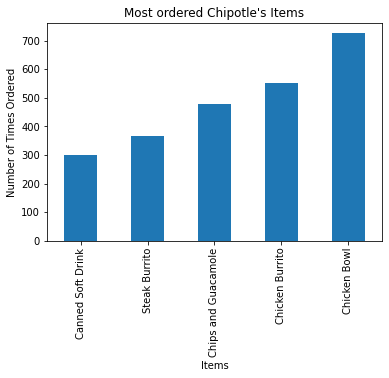

In [54]:
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

##### Step 17. Create a scatterplot with the number of items orderered per order price

(0.0, 36.7)

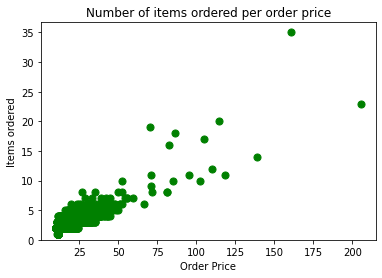

In [57]:
# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)
